In [1]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.0/154.0 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 2.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 2.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 1.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.3 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 1.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 2.9 MB/s eta 0:00:0000:0100:02
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.10.0
    Uninstalling platformdirs-3.10.0:
      S

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import get_column_plot, evaluate_quality
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Matplotlib is building the font cache; this may take a moment.


# **Import Data**

In [3]:
data = pd.read_excel("Telco_customer_churn.xlsx")
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
data = data.drop(columns=['Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'])
data.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
3,7892-POOKP,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
4,0280-XJGEX,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


# **Data Preprocessing**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [6]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

**Remove duplicate data**

In [8]:
data.drop_duplicates()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
3,7892-POOKP,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
4,0280-XJGEX,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Female,No,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7039,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7040,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7041,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [9]:
data.isnull().sum()

CustomerID            0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
dtype: int64

Null data detected. We should drop "null" data.

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

CustomerID           0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
dtype: int64

**Encoding using LabelEncoder**

Checking the category of each variable

In [12]:
columns_to_check = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
                    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
                    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                    'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']

# Loop through each column and print unique values
for column in columns_to_check:
    print(f"Unique values in '{column}': {data[column].unique()}\n")

Unique values in 'Gender': ['Male' 'Female']

Unique values in 'Senior Citizen': ['No' 'Yes']

Unique values in 'Partner': ['No' 'Yes']

Unique values in 'Dependents': ['No' 'Yes']

Unique values in 'Phone Service': ['Yes' 'No']

Unique values in 'Multiple Lines': ['No' 'Yes' 'No phone service']

Unique values in 'Internet Service': ['DSL' 'Fiber optic' 'No']

Unique values in 'Online Security': ['Yes' 'No' 'No internet service']

Unique values in 'Online Backup': ['Yes' 'No' 'No internet service']

Unique values in 'Device Protection': ['No' 'Yes' 'No internet service']

Unique values in 'Tech Support': ['No' 'Yes' 'No internet service']

Unique values in 'Streaming TV': ['No' 'Yes' 'No internet service']

Unique values in 'Streaming Movies': ['No' 'Yes' 'No internet service']

Unique values in 'Contract': ['Month-to-month' 'Two year' 'One year']

Unique values in 'Paperless Billing': ['Yes' 'No']

Unique values in 'Payment Method': ['Mailed check' 'Electronic check' 'Bank transfer (a

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
                     'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
                     'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                     'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label']

for column in columns_to_encode:
    # Fit and transform the column
    data[column] = label_encoder.fit_transform(data[column])

    # Print the mapping
    print(f"{column}:")
    for class_, value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
        print(f"  {class_}: {value}")
    print()

# Apply LabelEncoder to each column
#for column in columns_to_encode:
#    data[column] = label_encoder.fit_transform(data[column])

# The data DataFrame now has the specified columns encoded as numerical labels

Gender:
  Female: 0
  Male: 1

Senior Citizen:
  No: 0
  Yes: 1

Partner:
  No: 0
  Yes: 1

Dependents:
  No: 0
  Yes: 1

Phone Service:
  No: 0
  Yes: 1

Multiple Lines:
  No: 0
  No phone service: 1
  Yes: 2

Internet Service:
  DSL: 0
  Fiber optic: 1
  No: 2

Online Security:
  No: 0
  No internet service: 1
  Yes: 2

Online Backup:
  No: 0
  No internet service: 1
  Yes: 2

Device Protection:
  No: 0
  No internet service: 1
  Yes: 2

Tech Support:
  No: 0
  No internet service: 1
  Yes: 2

Streaming TV:
  No: 0
  No internet service: 1
  Yes: 2

Streaming Movies:
  No: 0
  No internet service: 1
  Yes: 2

Contract:
  Month-to-month: 0
  One year: 1
  Two year: 2

Paperless Billing:
  No: 0
  Yes: 1

Payment Method:
  Bank transfer (automatic): 0
  Credit card (automatic): 1
  Electronic check: 2
  Mailed check: 3

Churn Label:
  No: 0
  Yes: 1



In [15]:
data.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
1,9237-HQITU,0,0,0,1,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
2,9305-CDSKC,0,0,0,1,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,820.50,1
3,7892-POOKP,0,0,1,1,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,3046.05,1
4,0280-XJGEX,1,0,0,1,49,1,2,1,0,...,2,0,2,2,0,1,0,103.70,5036.30,1


# **EDA**

In [16]:
data.describe()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.230375,32.421786,0.903299,0.940557,0.872582,0.789249,0.905859,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.421103,24.545260,0.295571,0.948627,0.737271,0.859962,0.880394,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


# **Demographic Analysis**

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_19292/1449174828.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn Label', data=data, palette=['steelblue', 'indianred'])


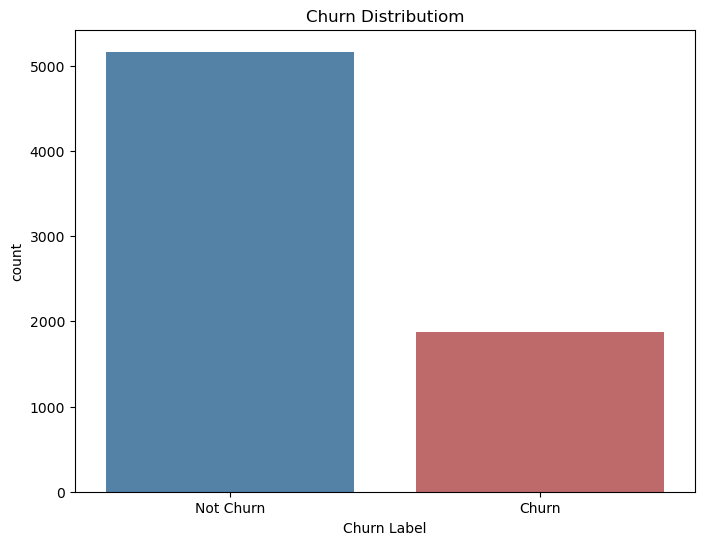

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn Label', data=data, palette=['steelblue', 'indianred'])
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.title('Churn Distributiom')

plt.show()

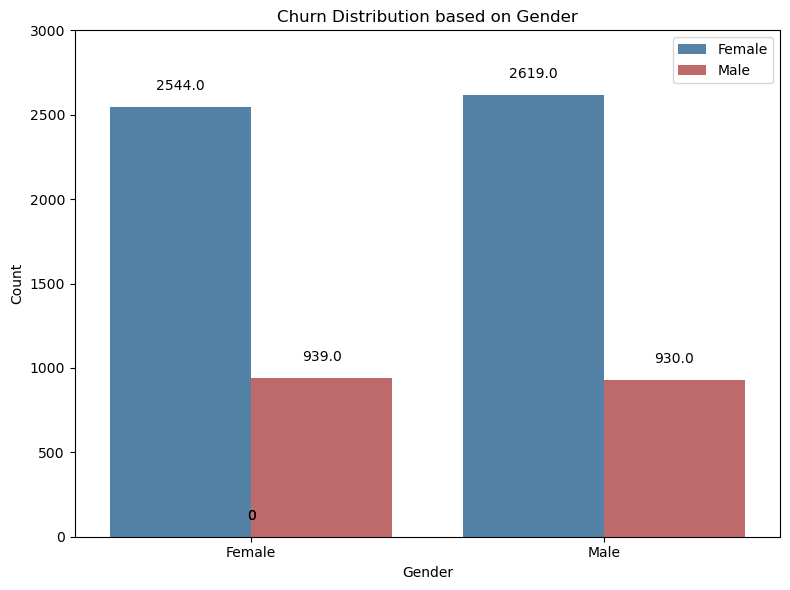

In [20]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', hue='Churn Label', data=data, palette=['steelblue', 'indianred'])
plt.ylabel('Count')
plt.xlabel('Gender')
plt.ylim(0, 3000)
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(['Female', 'Male'])
plt.title('Churn Distribution based on Gender')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 100, height, ha="center", color='black')

plt.tight_layout()
plt.show()

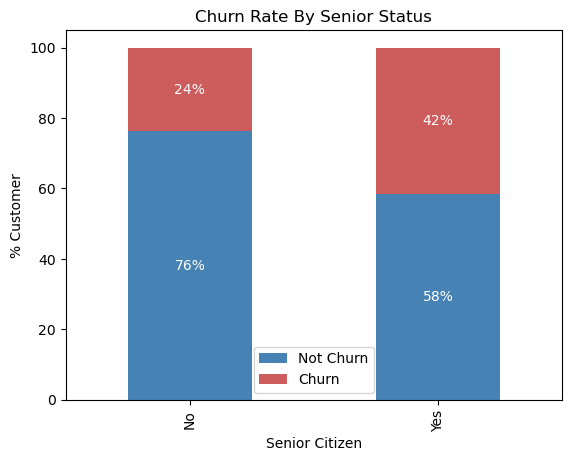

In [21]:
churn_counts_seniorcitizen = data.groupby(['Senior Citizen', 'Churn Label']).size().unstack()
churn_percentages_seniorcitizen = churn_counts_seniorcitizen.div(churn_counts_seniorcitizen.sum(axis=1), axis=0) * 100

ax = churn_percentages_seniorcitizen.plot(kind='bar', stacked=True, color=['steelblue', 'indianred'])
plt.title('Churn Rate By Senior Status')
plt.xlabel('Senior Citizen')
plt.ylabel('% Customer')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(['Not Churn', 'Churn'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (x+width/2, y+height/2), ha='center', va='center', color='white')
plt.show()

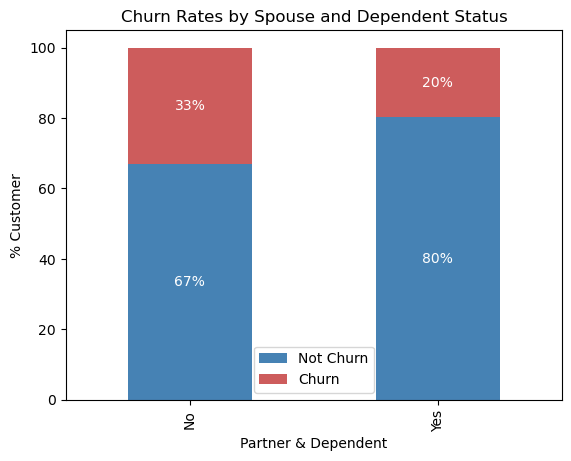

In [22]:
churn_counts_partner = data.groupby(['Partner', 'Churn Label']).size().unstack()
churn_percentages_partner = churn_counts_partner.div(churn_counts_partner.sum(axis=1), axis=0) * 100

ax = churn_percentages_partner.plot(kind='bar', stacked=True, color=['steelblue', 'indianred'])
plt.title('Churn Rates by Spouse and Dependent Status')
plt.xlabel('Partner & Dependent')
plt.ylabel('% Customer')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(['Not Churn', 'Churn'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (x+width/2, y+height/2), ha='center', va='center', color='white')
plt.show()

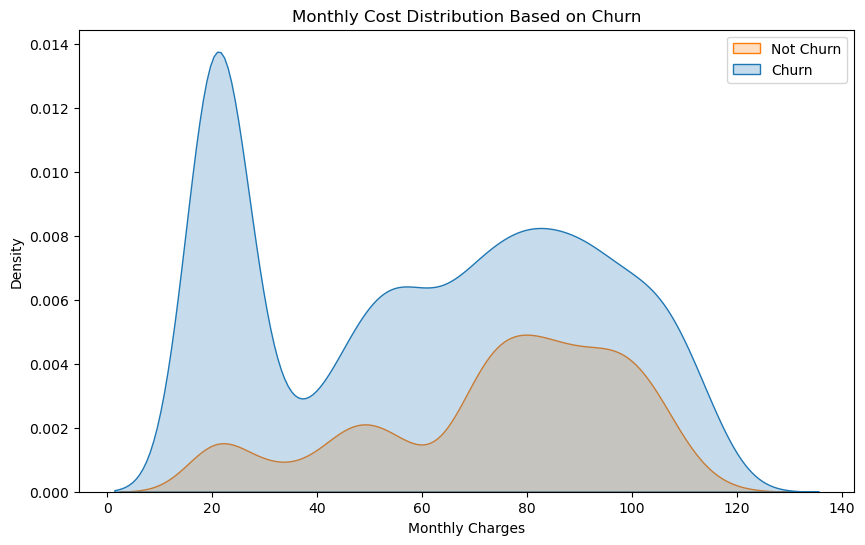

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Monthly Charges', hue='Churn Label', fill=True)
plt.title('Monthly Cost Distribution Based on Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend(['Not Churn', 'Churn'])
plt.show()

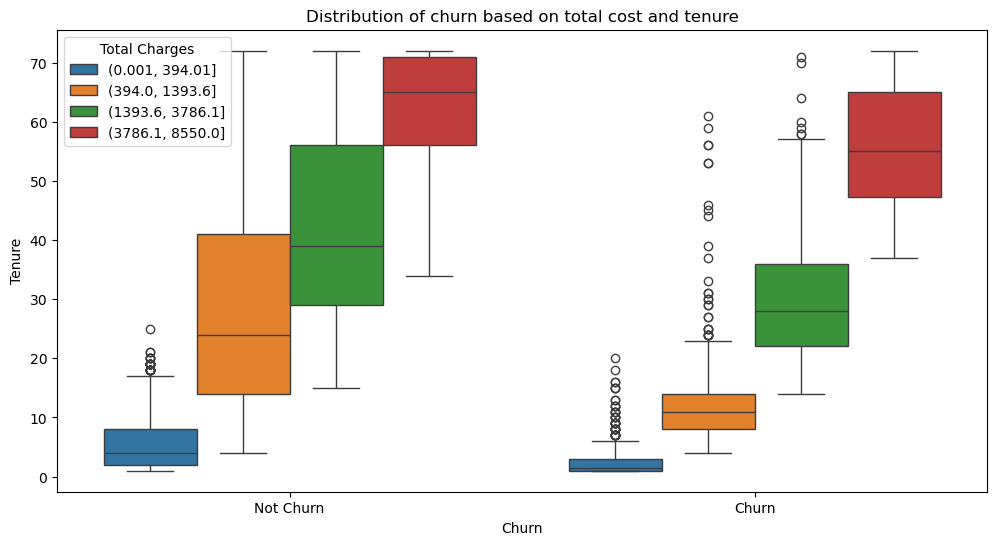

In [24]:
bins = [0, 394, 1393.6, 3786.1, 8550]
labels = ['(0.001, 394.01]', '(394.0, 1393.6]', '(1393.6, 3786.1]', '(3786.1, 8550.0]']
data['TotalCharges_cat'] = pd.cut(data['Total Charges'], bins=bins, labels=labels)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn Label', y='Tenure Months', hue='TotalCharges_cat', data=data)
plt.title('Distribution of churn based on total cost and tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.xticks([0, 1], ['Not Churn', 'Churn'])
plt.legend(title='Total Charges'),
plt.show()

# **Customer Account Information**

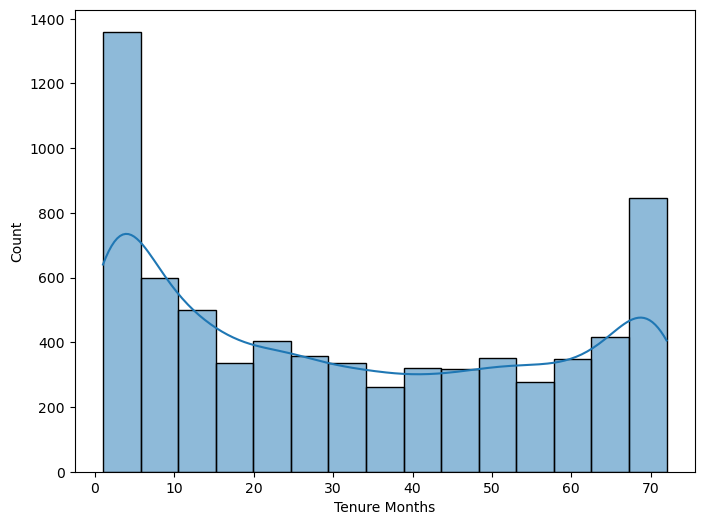

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(x='Tenure Months', data=data, kde=True)
plt.show()

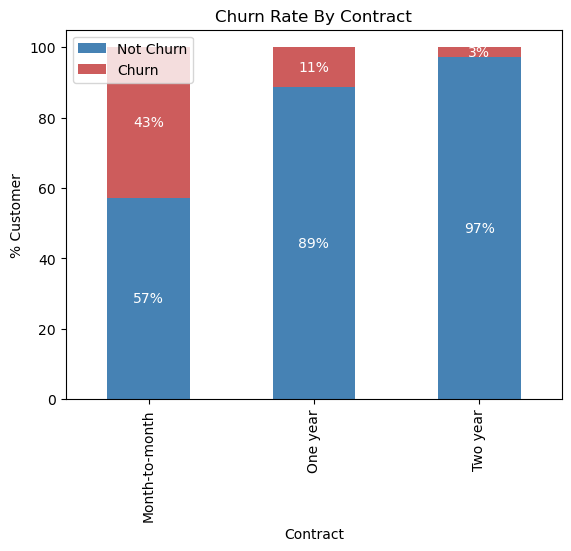

In [26]:
churn_counts_partner = data.groupby(['Contract', 'Churn Label']).size().unstack()
churn_percentages_partner = churn_counts_partner.div(churn_counts_partner.sum(axis=1), axis=0) * 100

ax = churn_percentages_partner.plot(kind='bar', stacked=True, color=['steelblue', 'indianred'])
plt.title('Churn Rate By Contract')
plt.xlabel('Contract')
plt.ylabel('% Customer')
plt.xticks([0, 1, 2], ['Month-to-month', 'One year', 'Two year'])
plt.legend(['Not Churn', 'Churn'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (x+width/2, y+height/2), ha='center', va='center', color='white')
plt.show()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_19292/1701413858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Contract', data=data, palette=['steelblue', 'olive','indianred'])


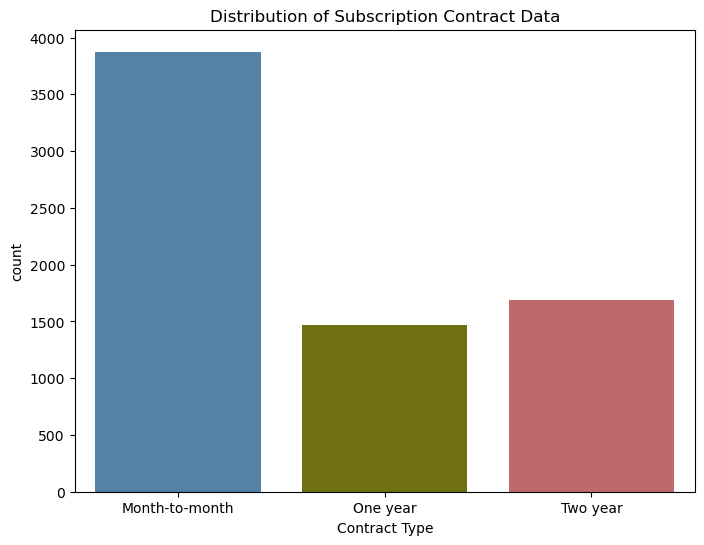

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data=data, palette=['steelblue', 'olive','indianred'])
plt.title('Distribution of Subscription Contract Data')
plt.xlabel('Contract Type')
plt.xticks([0, 1, 2], ['Month-to-month', 'One year', 'Two year'])
plt.show()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_19292/2162036340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Method', data=data, palette=['steelblue', 'olive','indianred', 'orange'])


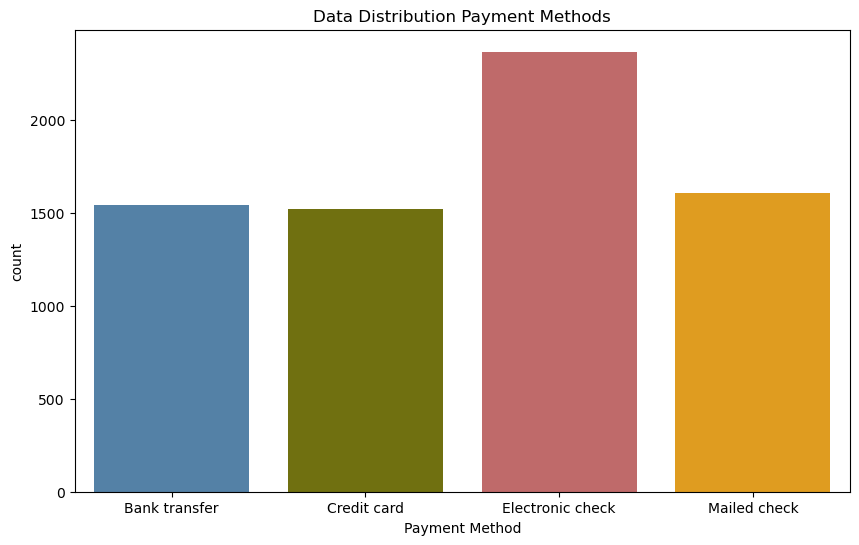

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', data=data, palette=['steelblue', 'olive','indianred', 'orange'])
plt.title('Data Distribution Payment Methods')
plt.xlabel('Payment Method')
plt.xticks([0, 1, 2, 3], ['Bank transfer', 'Credit card', 'Electronic check', 'Mailed check'])
plt.show()

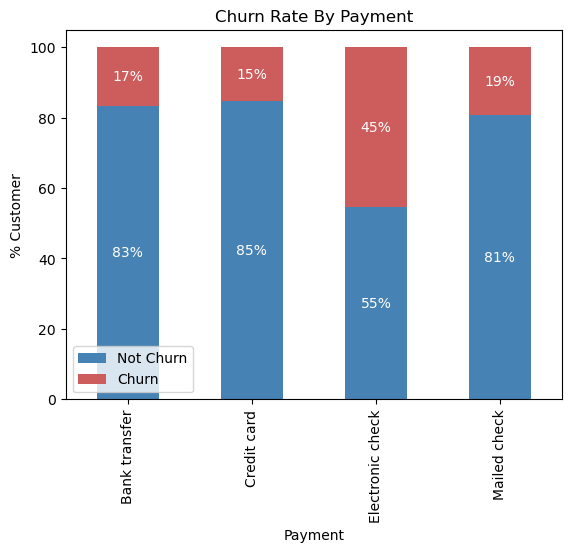

In [29]:
churn_counts_payment = data.groupby(['Payment Method', 'Churn Label']).size().unstack()
churn_percentages_payment = churn_counts_payment.div(churn_counts_payment.sum(axis=1), axis=0) * 100

ax = churn_percentages_payment.plot(kind='bar', stacked=True, color=['steelblue', 'indianred'])
plt.title('Churn Rate By Payment')
plt.xlabel('Payment')
plt.ylabel('% Customer')
plt.xticks([0, 1, 2, 3], ['Bank transfer', 'Credit card', 'Electronic check', 'Mailed check'])
plt.legend(['Not Churn', 'Churn'])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (x+width/2, y+height/2), ha='center', va='center', color='white')
plt.show()

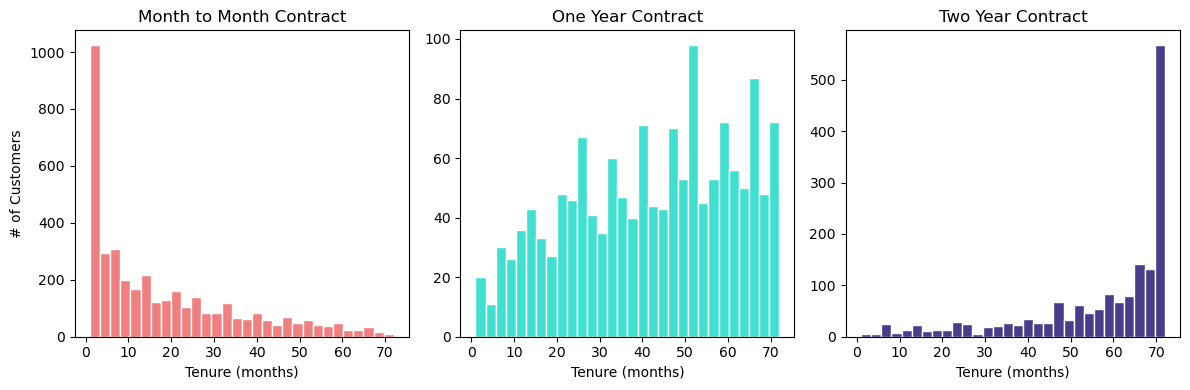

In [30]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(data[data['Contract'] == 0]['Tenure Months'], bins=30, color='lightcoral', edgecolor='white')
plt.title('Month to Month Contract')
plt.xlabel('Tenure (months)')
plt.ylabel('# of Customers')

plt.subplot(1, 3, 2)
plt.hist(data[data['Contract'] == 1]['Tenure Months'], bins=30, color='turquoise', edgecolor='white')
plt.title('One Year Contract')
plt.xlabel('Tenure (months)')
plt.ylabel('')  # Hide y-label for the middle plot

plt.subplot(1, 3, 3)
plt.hist(data[data['Contract'] == 2]['Tenure Months'], bins=30, color='darkslateblue', edgecolor='white')
plt.title('Two Year Contract')
plt.xlabel('Tenure (months)')
plt.ylabel('')  # Hide y-label for the right plot

plt.tight_layout()
plt.show()

# **Distribution of Various Services**

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_19292/1718876938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Internet Service', data=data, palette=['steelblue', 'olive','indianred'])


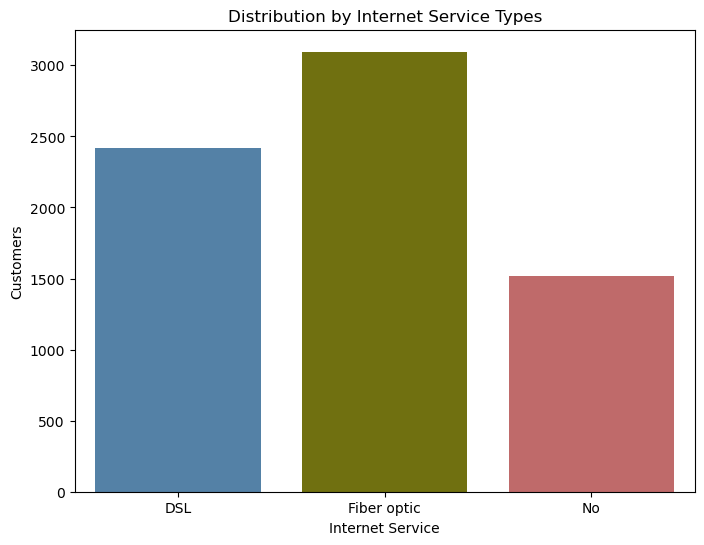

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Internet Service', data=data, palette=['steelblue', 'olive','indianred'])
plt.title('Distribution by Internet Service Types')
plt.xlabel('Internet Service')
plt.ylabel('Customers')
plt.xticks([0, 1, 2], ['DSL', 'Fiber optic', 'No'])
plt.show()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_19292/2114398640.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Phone Service', data=data, palette=['steelblue', 'indianred'])


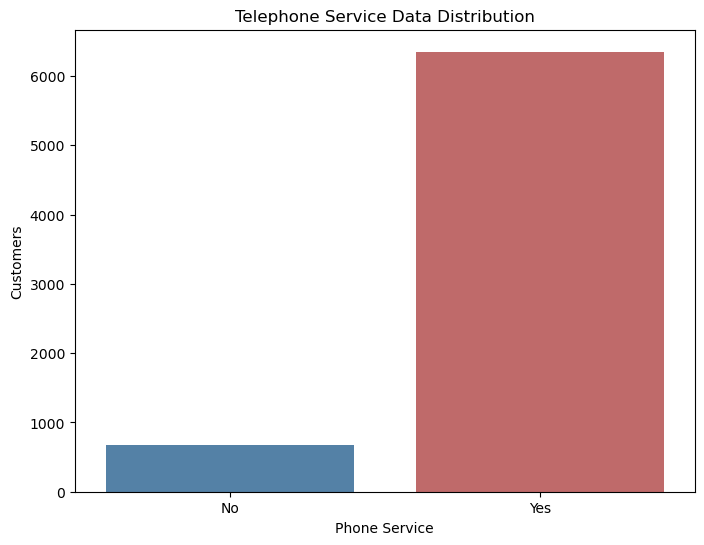

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Phone Service', data=data, palette=['steelblue', 'indianred'])
plt.title('Telephone Service Data Distribution')
plt.xlabel('Phone Service')
plt.ylabel('Customers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_19292/3252158420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=service, data=data, palette=['steelblue', 'olive','indianred'])
/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_19292/3252158420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=service, data=data, palette=['steelblue', 'olive','indianred'])
/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_19292/3252158420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=service, data=data, pal

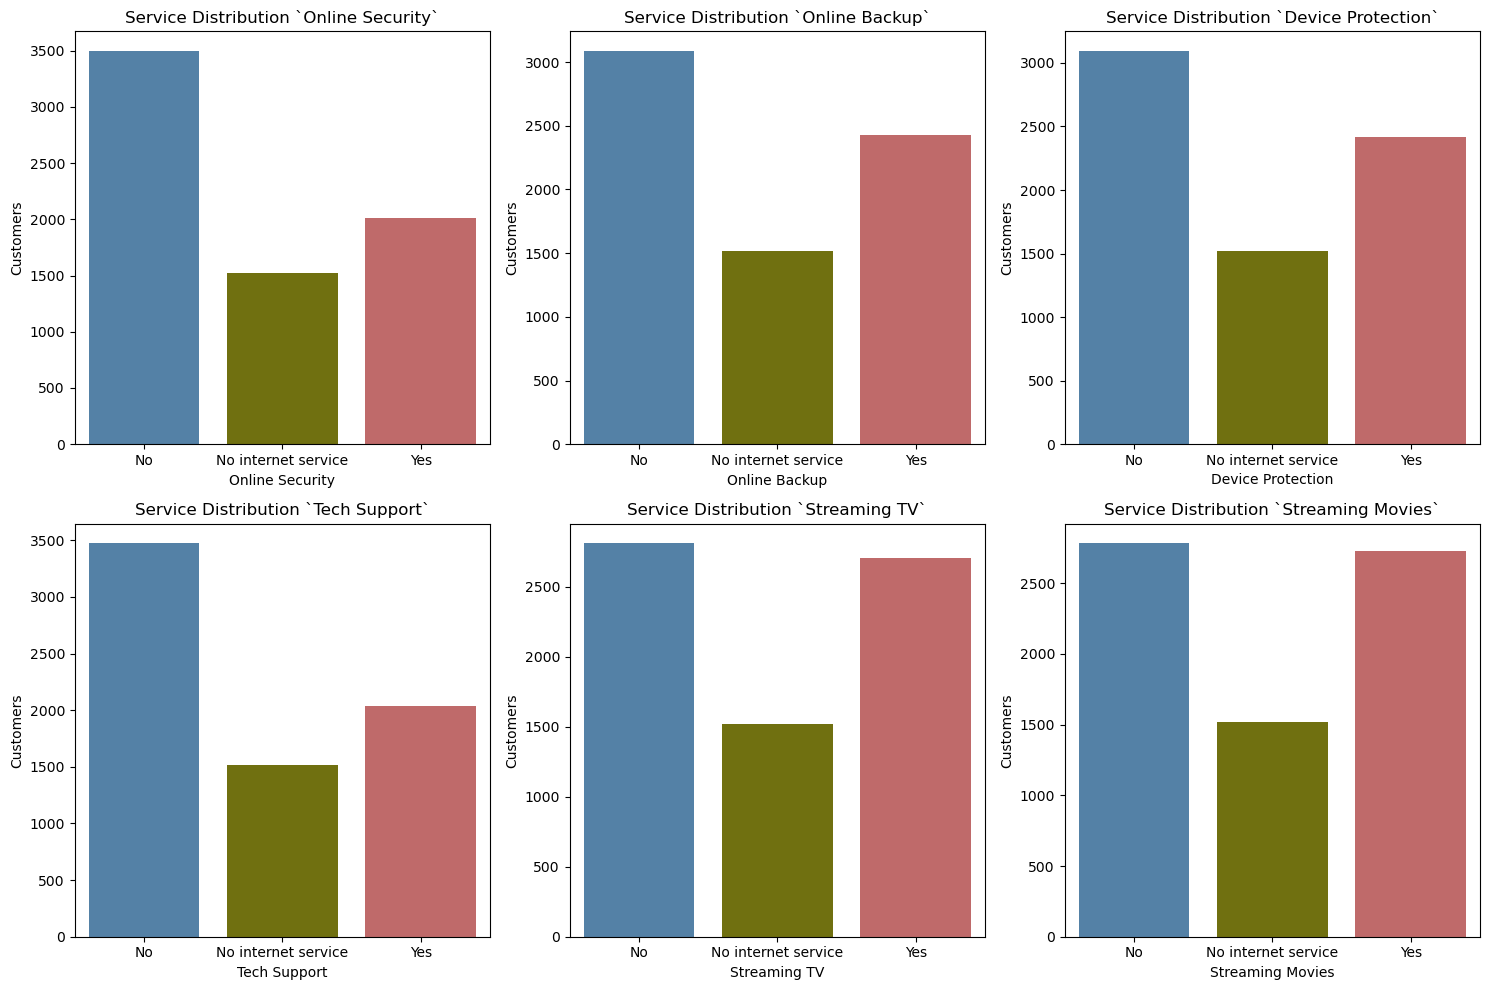

In [33]:
additional_services = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']
plt.figure(figsize=(15, 10))
for i, service in enumerate(additional_services):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=service, data=data, palette=['steelblue', 'olive','indianred'])
    plt.title(f'Service Distribution `{service}`')
    plt.xlabel(service)
    plt.ylabel('Customers')
    plt.xticks([0, 1, 2], ['No', 'No internet service', 'Yes'], rotation=0)
plt.tight_layout()
plt.show()

# **Charges Relationships**

<Figure size 800x600 with 0 Axes>

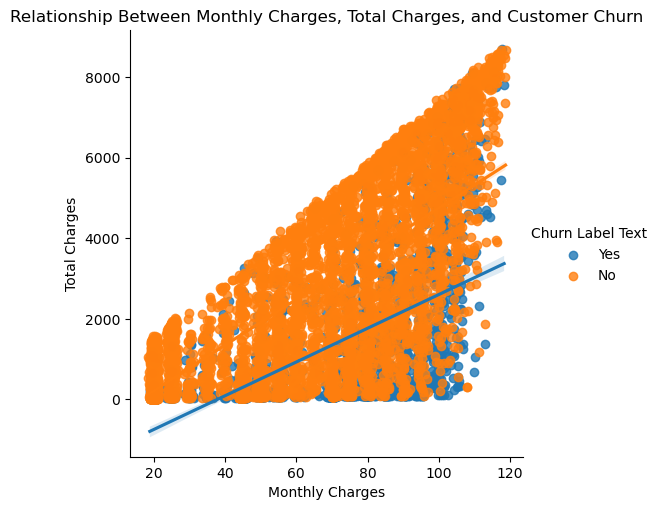

In [37]:
churn_label_map = {0: "No", 1: "Yes"}
data["Churn Label Text"] = data["Churn Label"].map(churn_label_map)
data_sample = data.copy()
data_sample['Total Charges'] = pd.to_numeric(data_sample['Total Charges'], errors='coerce')
plt.figure(figsize=(8, 6))
sns.lmplot(x='Monthly Charges', y='Total Charges', data=data_sample, hue='Churn Label Text')
plt.title('Relationship Between Monthly Charges, Total Charges, and Customer Churn')
plt.show()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_19292/2355069581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Label', y='Monthly Charges', data=data, palette=['steelblue','indianred'])


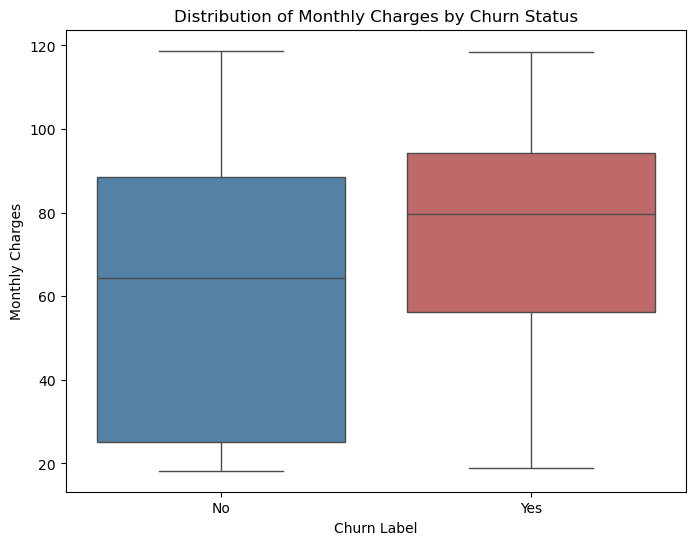

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn Label', y='Monthly Charges', data=data, palette=['steelblue','indianred'])
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Distribution of Monthly Charges by Churn Status')
plt.show()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_19292/1651808205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn Label', y='Total Charges', data=data_sample, palette=['steelblue','indianred'])


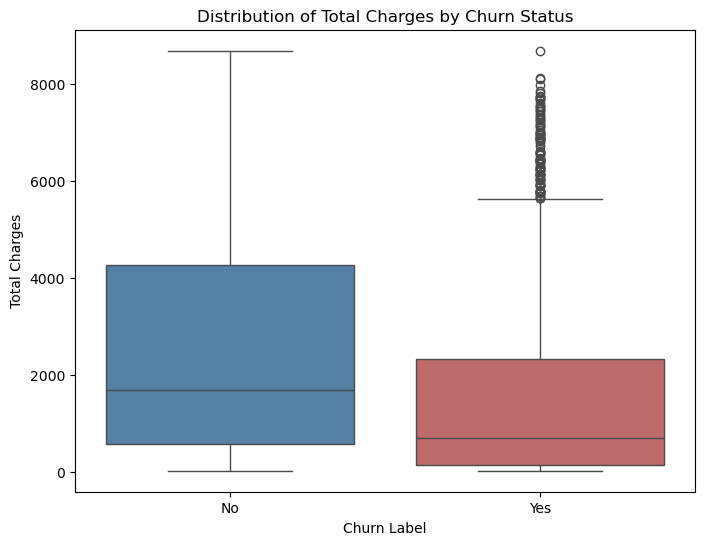

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn Label', y='Total Charges', data=data_sample, palette=['steelblue','indianred'])
plt.ylabel('Total Charges')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Distribution of Total Charges by Churn Status')
plt.show()

/var/folders/mz/llvvn1v51dd9t44bxxctnyy00000gn/T/ipykernel_19292/1098910417.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_sample['Total Charges'].fillna(0, inplace=True)


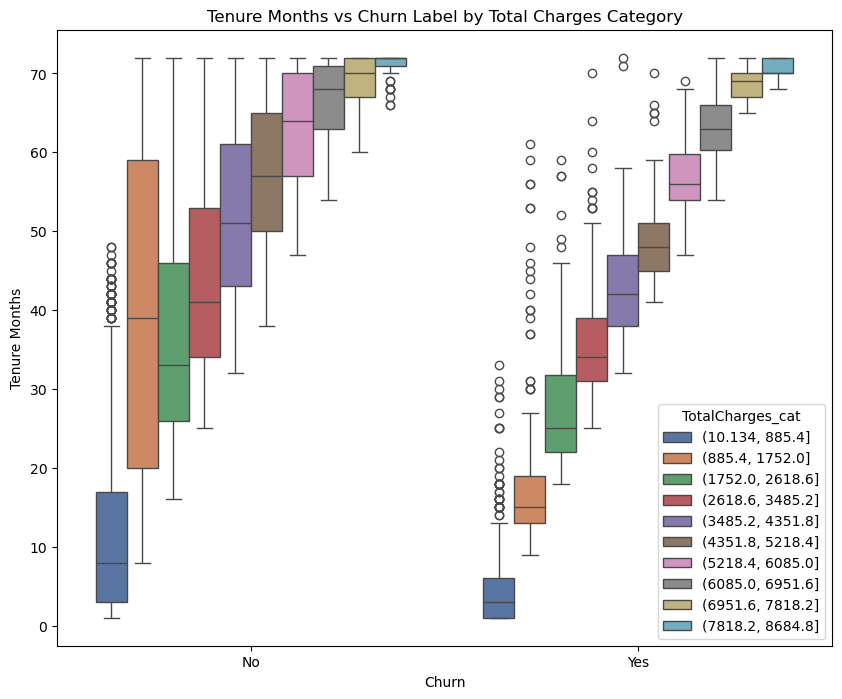

In [40]:
data_sample['Total Charges'] = pd.to_numeric(data_sample['Total Charges'], errors='coerce')

data_sample['Total Charges'].fillna(0, inplace=True)

data_sample['TotalCharges_cat'] = pd.cut(data_sample['Total Charges'], bins=10)

plt.figure(figsize=(10, 8))
sns.boxplot(x='Churn Label', y='Tenure Months', data=data_sample, hue='TotalCharges_cat', palette='deep')
plt.xlabel('Churn')
plt.ylabel('Tenure Months')
plt.title('Tenure Months vs Churn Label by Total Charges Category')
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

# **Classification using XGBoost Classifier**

**Check the data whether it's balanced or imbalanced**

Churn Label
0    5163
1    1869
Name: count, dtype: int64


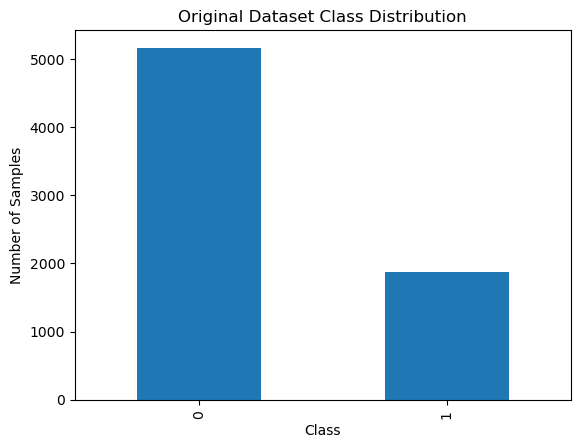

In [41]:
class_distribution = data['Churn Label'].value_counts()
print(class_distribution)

def plot_class_distribution(y, title):
    class_distribution = pd.Series(y).value_counts()
    class_distribution.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.show()

# Visualize the original dataset
plot_class_distribution(data['Churn Label'], 'Original Dataset Class Distribution')

Based on the bar chart, the data class is imbalanced.

In [43]:
!pip install ctgan

In [44]:
!pip install torch

In [45]:
!pip install imbalanced-learn

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from ctgan import CTGAN
import xgboost as xgb

# Pisahkan data dan label
X = data.drop(["CustomerID", "Churn Label", "TotalCharges_cat", "Churn Label Text"], axis=1)
y = data["Churn Label"]

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Definisikan parameter grid untuk tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Fungsi untuk melatih dan mengevaluasi model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    return accuracy, report

# Fungsi untuk melakukan hyperparameter tuning
def hyperparameter_tuning(X_train, y_train):
    model = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False)
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv=3,
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

In [47]:
print("Hyperparameter Tuning: XGBoost Without Balancing Data Techniques")
best_model, best_params = hyperparameter_tuning(X_train, y_train)
accuracy, report = train_and_evaluate(best_model, X_train, y_train, X_test, y_test)
print("Best Parameters:", best_params)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", pd.DataFrame(report))

Hyperparameter Tuning: XGBoost Without Balancing Data Techniques
Fitting 3 folds for each of 64 candidates, totalling 192 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:22:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:22:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:22:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:22:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.828125
Classification Report:
                     0           1  accuracy   macro avg  weighted avg
precision    0.855556    0.737805  0.828125    0.796680      0.822271
recall       0.914851    0.608040  0.828125    0.761446      0.828125
f1-score     0.884211    0.666667  0.828125    0.775439      0.822717
support    505.000000  199.000000  0.828125  704.000000    704.000000


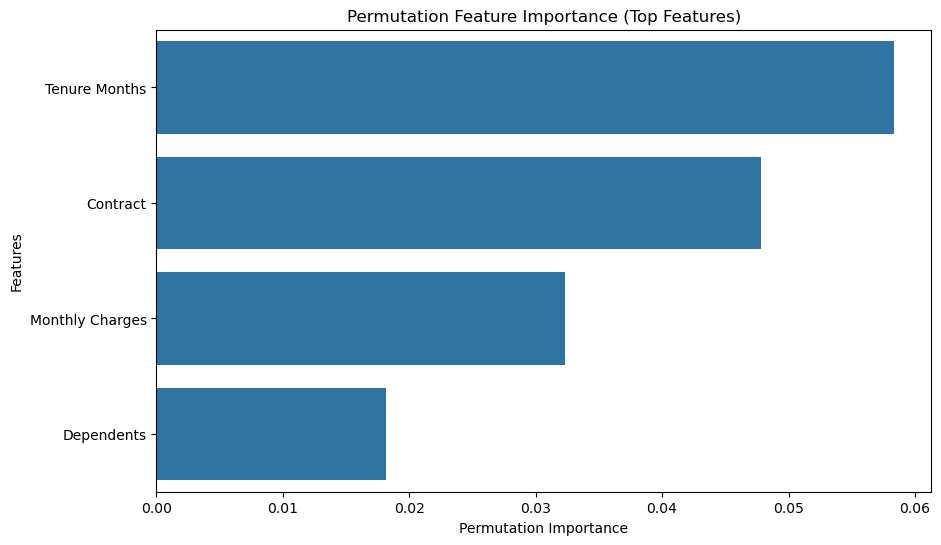

In [48]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()[::-1]
sorted_features = X.columns[sorted_idx]
sorted_importance = perm_importance.importances_mean[sorted_idx]

top_n_features = 4

plt.figure(figsize=(10, 6))
sns.barplot(y=sorted_features[:top_n_features], x=sorted_importance[:top_n_features], orient='h')
plt.title('Permutation Feature Importance (Top Features)')
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.show()